In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# association Lib

from mlxtend.frequent_patterns import apriori,association_rules

from mlxtend.preprocessing import TransactionEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
book = pd.read_csv('book.csv')

In [5]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



# Apriori Algorithm 

### Association Rules with 10% Support and 75% confidence

In [8]:
frequent_item = apriori(book,min_support=0.1,use_colnames=True)

In [9]:
rules_1 = association_rules(frequent_item,metric='confidence',min_threshold=0.75)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
2,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
3,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
4,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
5,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
6,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
7,"(ArtBks, CookBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235
8,"(ArtBks, ChildBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403
9,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081


In [11]:
rules_1.shape

(16, 9)

Text(0, 0.5, 'confidence')

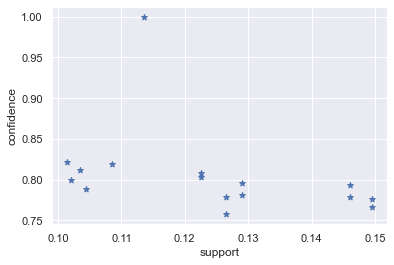

In [12]:
# visualization of obtained rule

plt.scatter(rules_1['support'],rules_1['confidence'],marker='*')
plt.xlabel('support')
plt.ylabel('confidence')


### Association Rules with 5% Support and 90% confidence

In [13]:
frequent_items = apriori(book,min_support=0.05,use_colnames=True)

In [14]:
rules_2 = association_rules(frequent_items, metric = 'confidence',min_threshold=0.9 )

rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
2,"(ItalCook, YouthBks)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
3,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
4,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
5,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
6,"(YouthBks, RefBks, DoItYBks)",(ChildBks),0.0580,0.423,0.0530,0.913793,2.160267,0.028466,6.693200
7,"(GeogBks, RefBks, YouthBks)",(ChildBks),0.0570,0.423,0.0515,0.903509,2.135955,0.027389,5.979818
8,"(GeogBks, ItalCook, ChildBks)",(CookBks),0.0525,0.431,0.0525,1.000000,2.320186,0.029872,inf
9,"(GeogBks, YouthBks, ChildBks, DoItYBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182


In [15]:
rules_2.shape

(10, 9)

Text(0, 0.5, 'confidence')

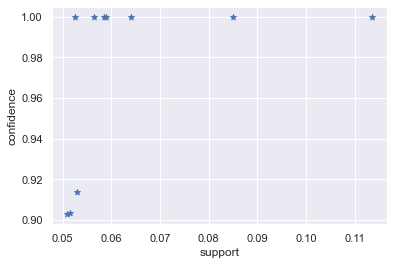

In [16]:
# visualization of obtained rule

plt.scatter(rules_2['support'],rules_2['confidence'],marker='*')
plt.xlabel('support')
plt.ylabel('confidence')


### Association Rules with 10% Support and 95% confidence

In [17]:
frequent_items1 = apriori(book,min_support=0.1,use_colnames=True)

In [18]:
rules_3 = association_rules(frequent_items1, metric = 'confidence',min_threshold=0.95 )

rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf


In [19]:
rules_3.shape

(1, 9)

Text(0, 0.5, 'confidence')

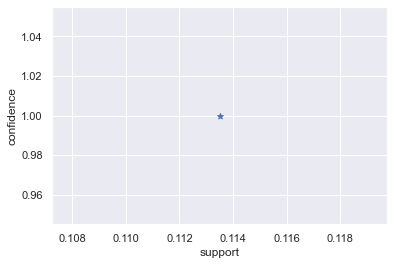

In [20]:
# visualization of obtained rule

plt.scatter(rules_3['support'],rules_3['confidence'],marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
